In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
#df=pd.read_csv('/content/drive/My Drive/Lending_club/loan.csv')
df = pd.read_csv('loan.csv',encoding = "ISO-8859-1", low_memory=False)

### Data Exploration

In [54]:
df.columns


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

We will avoid all the columns related to customer behaviour for analysis.

In [55]:
len(df['zip_code'].unique())

823

There are 823 different zip code . So we can avoid that as won't get any generalized opnion. Data is very spread out 

In [56]:
len(df['title'].unique())

19616

Percentage of missing value columns and dropping them from the data set.

In [57]:
missing_details = round(100*(df.isnull().sum()/len(df.id)), 2)
missing_details.loc[missing_details > 0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

In [58]:
# Removing the columns with missing value more than 50%

columns_with_missing_values = list(missing_details[missing_details >= 50].index)

len(columns_with_missing_values)

57

In [59]:
# Drop the columns with missing value from the dataframe
df = df.drop(columns_with_missing_values,axis=1)

In [60]:
# Checking for % of null values

round(100*(df.isnull().sum()/len(df.index)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

Too many different values for title columns. So can't use them

ID and Member_ID are adding no information about the customer. So it is better to drop them

In [61]:
df=df.loc[:,['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership','annual_inc','issue_d','loan_status','purpose','addr_state','dti','pub_rec','pub_rec_bankruptcies']]

In [62]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,pub_rec,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Dec-11,Fully Paid,credit_card,AZ,27.65,0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Dec-11,Charged Off,car,GA,1.00,0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Dec-11,Fully Paid,small_business,IL,8.72,0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Dec-11,Fully Paid,other,CA,20.00,0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Dec-11,Current,other,OR,17.94,0,0.0


### Checking percentage of missing values in each column 

In [65]:
round((df.isnull().sum() / df.shape[0] * 100.00),2)

loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_length              2.71
home_ownership          0.00
annual_inc              0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
addr_state              0.00
dti                     0.00
pub_rec                 0.00
pub_rec_bankruptcies    1.75
dtype: float64

Removing rows with missing values in column emp_length and pub_rec_bankruptcies

In [66]:
df = df[~df.pub_rec_bankruptcies.isnull()]
df = df[~df.emp_length.isnull()]

In [68]:
round((df.isnull().sum() / df.shape[0] * 100.00),2)

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
pub_rec                 0.0
pub_rec_bankruptcies    0.0
dtype: float64

Removing all the rows with loan status as 'Current'. As they neither defaulter nor they have completed loan.

In [69]:
df.drop(df[df['loan_status']=='Current'].index, inplace = True) 
df['loan_status'].unique()


array(['Fully Paid', 'Charged Off'], dtype=object)

Remove duplicate rows

In [70]:
df=df.drop_duplicates()

In [71]:
df.shape

(36847, 18)

### Duration column to only numeric

In [72]:
df['term']=df['term'].str[1:3]
pd.to_numeric(df['term'])

0        36
1        60
2        36
3        36
5        36
6        60
7        36
8        60
9        60
10       60
11       36
12       36
13       36
14       36
15       36
16       36
17       36
18       36
19       36
20       60
21       36
22       36
23       36
24       36
25       36
26       36
27       60
28       36
29       36
30       36
         ..
38998    36
38999    36
39000    36
39001    36
39002    36
39003    36
39013    36
39025    36
39052    36
39084    36
39138    36
39216    36
39220    36
39251    36
39259    36
39288    36
39291    36
39346    36
39348    36
39362    36
39425    36
39430    36
39433    36
39475    36
39551    36
39562    36
39573    36
39623    36
39666    36
39680    36
Name: term, Length: 36847, dtype: int64

### Interest Rate column to only numeric

In [73]:
df['int_rate']=df['int_rate'].str[:-2]
df['int_rate']=df['int_rate'].astype(float)

### Fetching year of issue of loan

In [74]:
df['issue_year']=df['issue_d'].str[4:]


### Extracting duration of employment

In [75]:
df['emp_length']=df.emp_length.str.extract('(\d+)')


###Segmenting loan amount

Bin size : 5000


In [76]:
df.loan_amnt.describe()

count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [77]:
df['loan_amnt_ctg']=df['loan_amnt']/5000
df['loan_amnt_ctg']=df['loan_amnt_ctg'].astype(int)

### Segmenting funded amount

Bin size : 5000


In [78]:
df.funded_amnt.describe()

count    36847.000000
mean     10872.924526
std       7109.330771
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [0]:
df['funded_amnt_ctg']=df['funded_amnt']/5000
df['funded_amnt_ctg']=df['funded_amnt_ctg'].astype(int)

### Segmenting invested amount

Bin size : 5000


In [79]:
 df.funded_amnt_inv.describe()

count    36847.000000
mean     10430.400856
std       7008.919431
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14335.044685
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [80]:
df['funded_amnt_inv_ctg']=df['funded_amnt_inv']/5000
df['funded_amnt_inv_ctg']=df['funded_amnt_inv_ctg'].astype(int)

### Data Cleaning for annual income column

In [81]:
df.annual_inc.describe()

count    3.684700e+04
mean     6.940448e+04
std      6.402747e+04
min      4.000000e+03
25%      4.100400e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

Outlier Handling

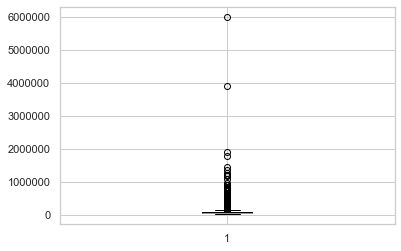

In [82]:
plt.boxplot(df.annual_inc)
plt.show()

Removing 1% quantile from the last.

In [83]:
df.annual_inc.quantile(0.99)

235000.0

In [84]:
df.drop(df[df['annual_inc']>230000].index, inplace = True) 


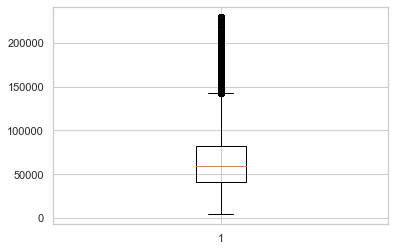

In [85]:
plt.boxplot(df.annual_inc)
plt.show()

In [86]:
df['annual_inc_ctg']=df['annual_inc']/10000
df['annual_inc_ctg']=df['annual_inc_ctg'].astype(int)

### Segmenting interest rate column

In [87]:
df.int_rate.describe()

count    36463.000000
mean        11.920108
std          3.693289
min          5.400000
25%          8.900000
50%         11.800000
75%         14.400000
max         24.400000
Name: int_rate, dtype: float64

In [0]:
df['int_rate_ctg']=df['int_rate']/3
df['int_rate_ctg']=df['int_rate_ctg'].astype(int)

In [88]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,loan_status,purpose,addr_state,dti,pub_rec,pub_rec_bankruptcies,issue_year,loan_amnt_ctg,funded_amnt_inv_ctg,annual_inc_ctg
0,5000,5000,4975.0,36,10.6,162.87,B,B2,10,RENT,...,Fully Paid,credit_card,AZ,27.65,0,0.0,11,1,0,2
1,2500,2500,2500.0,60,15.2,59.83,C,C4,1,RENT,...,Charged Off,car,GA,1.00,0,0.0,11,0,0,3
2,2400,2400,2400.0,36,15.9,84.33,C,C5,10,RENT,...,Fully Paid,small_business,IL,8.72,0,0.0,11,0,0,1
3,10000,10000,10000.0,36,13.4,339.31,C,C1,10,RENT,...,Fully Paid,other,CA,20.00,0,0.0,11,2,2,4
5,5000,5000,5000.0,36,7.9,156.46,A,A4,3,RENT,...,Fully Paid,wedding,AZ,11.20,0,0.0,11,1,1,3


In [90]:
df.to_csv('master_loan.csv', encoding='utf-8', index=False)

In [92]:
master_loan = df[:]

In [95]:
# reference:  https://stackoverflow.com

def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [96]:
# This function plots a given column buckets against loan_status (default = 'Charged Off')
# The plots are in percentages 
# (absolute numbers do not make sense -> category values can have very different absolute numbers)
# We want to see what are the chances of some category leading to loan default
# Absolute numbers are also printed to assess level of confidence in a % value. 
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [97]:
# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (master_loan[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    #ax = master_loan.groupby('loan_status')['term'].value_counts(normalize=True).loc[:'Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
    values = (master_loan.loc[master_loan['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    f
    showLabels(ax)

In [98]:
# This method plots a distribution of target column, and its boxplot against loan_status column
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [99]:
(master_loan['grade'].value_counts(normalize=True)*100).sort_index()

A    25.919425
B    30.326632
C    20.311000
D    13.180484
E     6.949510
F     2.528591
G     0.784357
Name: grade, dtype: float64

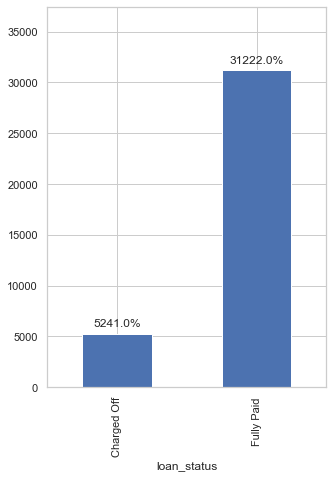

In [100]:
plt.figure(figsize=(5,7))
ax = master_loan.groupby('loan_status').loan_amnt.count().plot.bar()
showLabels(ax)
plt.show()

In [101]:
print("%.2f" % (master_loan.loc[master_loan['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(master_loan)))

14.37


14.37% of loan in the data set is charged off i.e. defaulted

'loan_amnt' -> Amount of loan applied by the borrower.

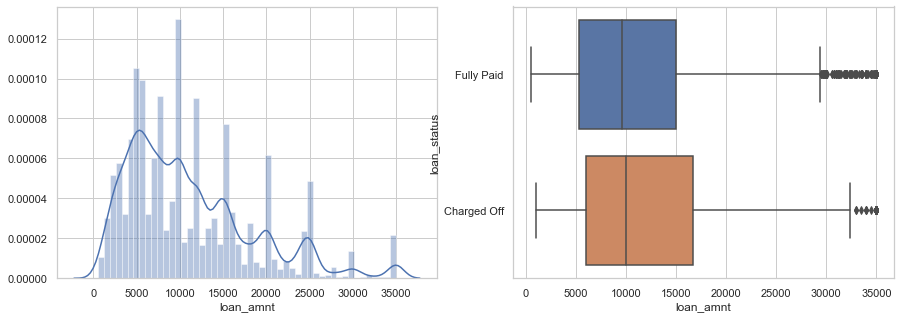

In [103]:
plot_distribution(master_loan, 'loan_amnt')

In [104]:
master_loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5241.0,12171.961458,8058.095308,1000.0,6000.0,10000.0,16750.0,35000.0
Fully Paid,31222.0,10863.890846,7129.991180,500.0,5375.0,9600.0,15000.0,35000.0


Observation:

1. Overall, the applied loan amount distribution mean greater than the median. Most of the loans granted are below 15000 i.e. 75 percentile value
2. Funding amounts see a spike around each 5000 boundary. We will use 5000 as bucket size for later analysis.
3. Charged off loans are shifted towards higher average loan amount request.

In [105]:
#Create Derived categorical variable
master_loan['loan_amnt_bin'] = pd.cut(master_loan['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])


C:\Users\Nikita\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


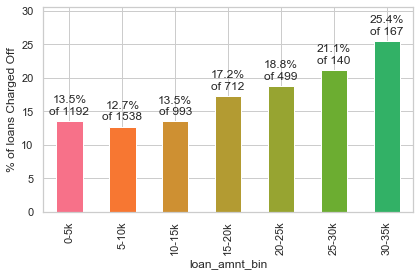

In [106]:
plotLoanStatus(master_loan, 'loan_amnt_bin')

In [107]:
#The % of charged off loans increases substancially as we go up the loan amount buckets. Most loans are below 20000 amount. The higher loans, though lesser in number, carry a substantially higher risk of default